<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Practise Loading and Describing Data 

---

In this lab you will practise loading data using Python and describing it with statistics.

It might be a good idea to first check the [source and data dictionary of the Boston housing data](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)

### 1. Load the boston housing data (provided) and examine the first few rows

Refer to the data dictionary above to make sense of the columns!

In [17]:
import pandas as pd
import numpy as np

housing = pd.read_csv("../datasets/boston_housing_data.csv")
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### 2. Make your life easier by giving the columns more meaningful names

In [18]:
boston_cols = ['crime_rate','lot_allocation','non_retail_business','bounds_river','nox_conc','rooms','pre_1940','emp_centre_dist','rad_highways','tax_rate','pupil_ratio','blacks','lower_status','home_value'] 
housing = pd.read_csv('../datasets/boston_housing_data.csv', header=0, names=boston_cols)
housing.head()

,crime_rate,lot_allocation,non_retail_business,bounds_river,nox_conc,rooms,pre_1940,emp_centre_dist,rad_highways,tax_rate,pupil_ratio,blacks,lower_status,home_value
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### 3.  Conduct a brief integrity check of your data. 

This integrity check should include, but is not limited to, checking for missing values and making sure all values make logical sense. (i.e. is one variable a percentage, but there are observations above 100%?)

Summarize your findings in a few sentences, including what you checked and, if appropriate, any 
steps you took to rectify potential integrity issues.

In [19]:
# Check for null values
print((housing.isnull().sum()))

crime_rate             0
lot_allocation         0
non_retail_business    0
bounds_river           0
nox_conc               0
rooms                  0
pre_1940               0
emp_centre_dist        0
rad_highways           0
tax_rate               0
pupil_ratio            0
blacks                 0
lower_status           0
home_value             0
dtype: int64


In [20]:
# Check whether any of the percentage columns have values over 100
housing[(housing.iloc[:,[1,2,6,10,11,12]] >= 100).any(axis=1)].head()

,crime_rate,lot_allocation,non_retail_business,bounds_river,nox_conc,rooms,pre_1940,emp_centre_dist,rad_highways,tax_rate,pupil_ratio,blacks,lower_status,home_value
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [21]:
# Check whether the percentage columns have values greater than 100, if so, set to null
l = [1,2,6,10,12]

for num in l:
    housing.loc[housing[boston_cols[num]]>100,boston_cols[num]] = np.nan

### 4. For what two attributes does it make the *least* sense to calculate mean and median? Why?

In [22]:
housing.describe()
# bounds_river is a true / false criteria, so median, mean are meaningless
# rad_highways are categorical data (i.e. index of accessibility) - doesn't make sense to have a median, mean

,crime_rate,lot_allocation,non_retail_business,bounds_river,nox_conc,rooms,pre_1940,emp_centre_dist,rad_highways,tax_rate,pupil_ratio,blacks,lower_status,home_value
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,1.716290,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.696228,4.332016,408.237154,18.455534,356.674032,12.653063,22.532806
std,2.653510,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,1.999689,1.417166,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,0.585700,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.073700,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.250895,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.107300,4.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,2.326718,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.112625,5.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,9.966540,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,9.222900,8.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### 5. Univariate analysis of your choice

Conduct a full univariate (single variable) analysis on MEDV, CHAS, TAX, and RAD. 

For each variable, you should answer the three questions generally asked in a univariate analysis using the most appropriate metrics.
- A measure of central tendency
- A measure of spread
- A description of the shape of the distribution (using a plot)

If you feel there is additional information that is relevant, include it. 

In [44]:
from scipy import stats
home_value_skew = stats.skew(housing['home_value'])
bounds_river_skew = stats.skew(housing['bounds_river'])
tax_rate_skew = stats.skew(housing['tax_rate'])
rad_highways_skew = stats.skew(housing['rad_highways'])

print (f"Home values skew = {home_value_skew} \nBounds river skew = {bounds_river_skew} \nTax rate skew = {tax_rate_skew} \nRadial highways skew = {rad_highways_skew} ")

Home values skew = 1.104810822864635 
Bounds river skew = 3.395799292642519 
Tax rate skew = 0.6679682687237768 
Radial highways skew = 0.36163273288021724 


In [45]:
home_value_std = housing['home_value'].std()
bounds_river_std = housing['bounds_river'].std()
tax_rate_std = housing['tax_rate'].std()
rad_highways_std = housing['rad_highways'].std()

print (f"Home values std = {home_value_std} \nBounds river std = {bounds_river_std} \nTax rate std = {tax_rate_std} \nRadial highways std = {rad_highways_std} ")

Home values std = 9.19710408737982 
Bounds river std = 0.2539940413404118 
Tax rate std = 168.53711605495926 
Radial highways std = 1.4171658677724543 


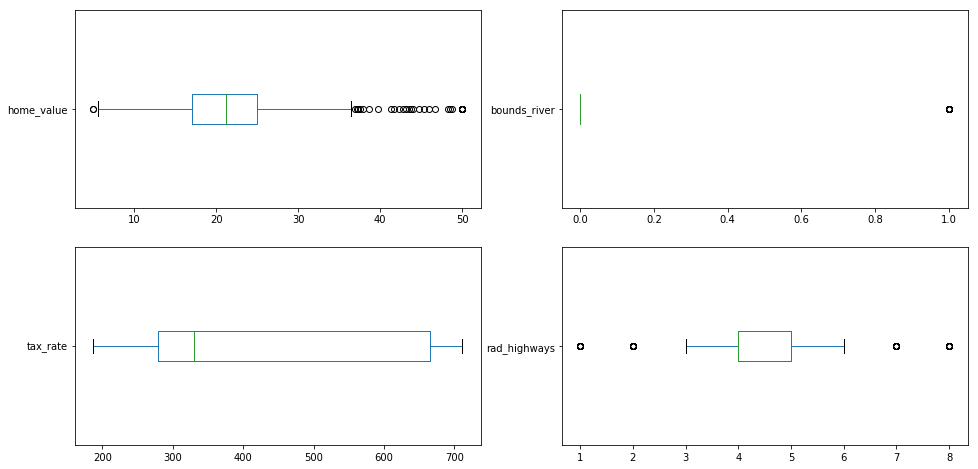

In [51]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 2, figsize=(16,8))
housing['home_value'].plot(kind='box', vert=False, ax=axes[0][0])
housing['bounds_river'].plot(kind='box', vert=False, ax=axes[0][1])
housing['tax_rate'].plot(kind='box', vert=False, ax=axes[1][0])
housing['rad_highways'].plot(kind='box', vert=False, ax=axes[1][1])

plt.show()

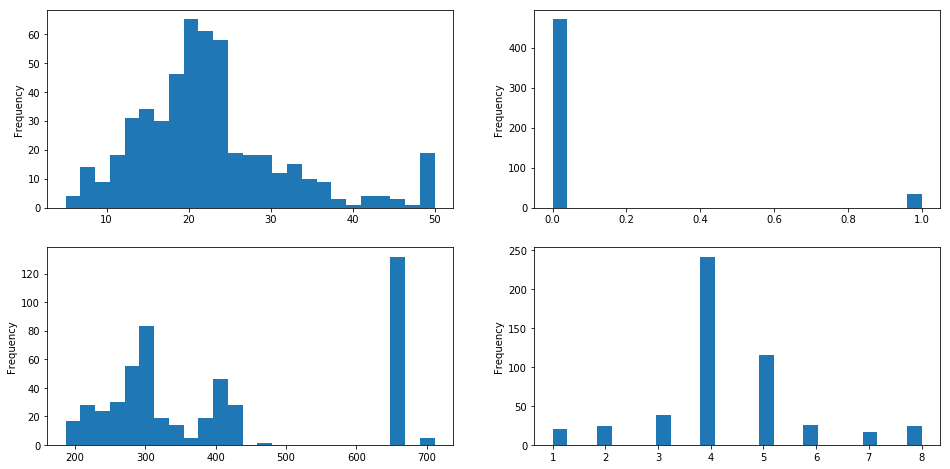

In [57]:
fig, axes = plt.subplots(2, 2, figsize=(16,8))
housing['home_value'].plot(kind='hist', bins=25, ax=axes[0][0])
housing['bounds_river'].plot(kind='hist', bins=25, ax=axes[0][1])
housing['tax_rate'].plot(kind='hist', bins=25, ax=axes[1][0])
housing['rad_highways'].plot(kind='hist', bins=25, ax=axes[1][1]);

